In [1]:
import numpy as np
import pandas as pd

#### Imports

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#### Loading Data

In [3]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

# Exploratory Data Analysis

### Looking at the Feature names

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


`RecipeName`, `CommentID`, `UserID`, `UserName` and `Recipe_Review` are text based features. Rest are numeric features. \
`Recipe_Review` features has two records with null values.


### Removing Null Values

In [5]:
train_data.dropna(how='any', inplace=True)

### Having a glimpse at the data 

In [6]:
train_data.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


`ID`, `CommentID`, `UserID` do not seem to provide any useful information. `CreationTimestamp` can be converted into a more readable format.

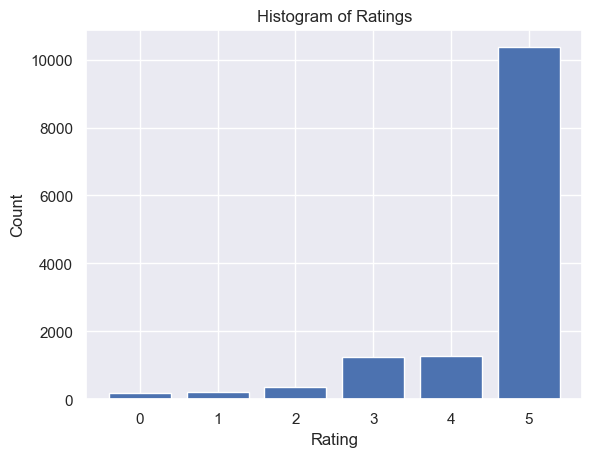

In [8]:
plt.bar([0, 1, 2, 3, 4, 5], 
        height=train_data['Rating'].value_counts(ascending=True))
plt.title("Histogram of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count");

We can see that the dataset is highly imbalanced with more than 70% concentrated in a single class.

### Adding Time Features

In [15]:
def add_features(X):
    X['Date']=pd.to_datetime(X['CreationTimestamp'], unit='s')
    X['Day']=X['Date'].dt.day_name()
    X['Hour']=X['Date'].apply(lambda x: x.hour + x.minute/60)
    return X

train_data=add_features(train_data)
test_data=add_features(test_data)

`add_features()` method adds `Date`, `Day` and `Hour` features to the train and test datasets.

### Looking at Time features

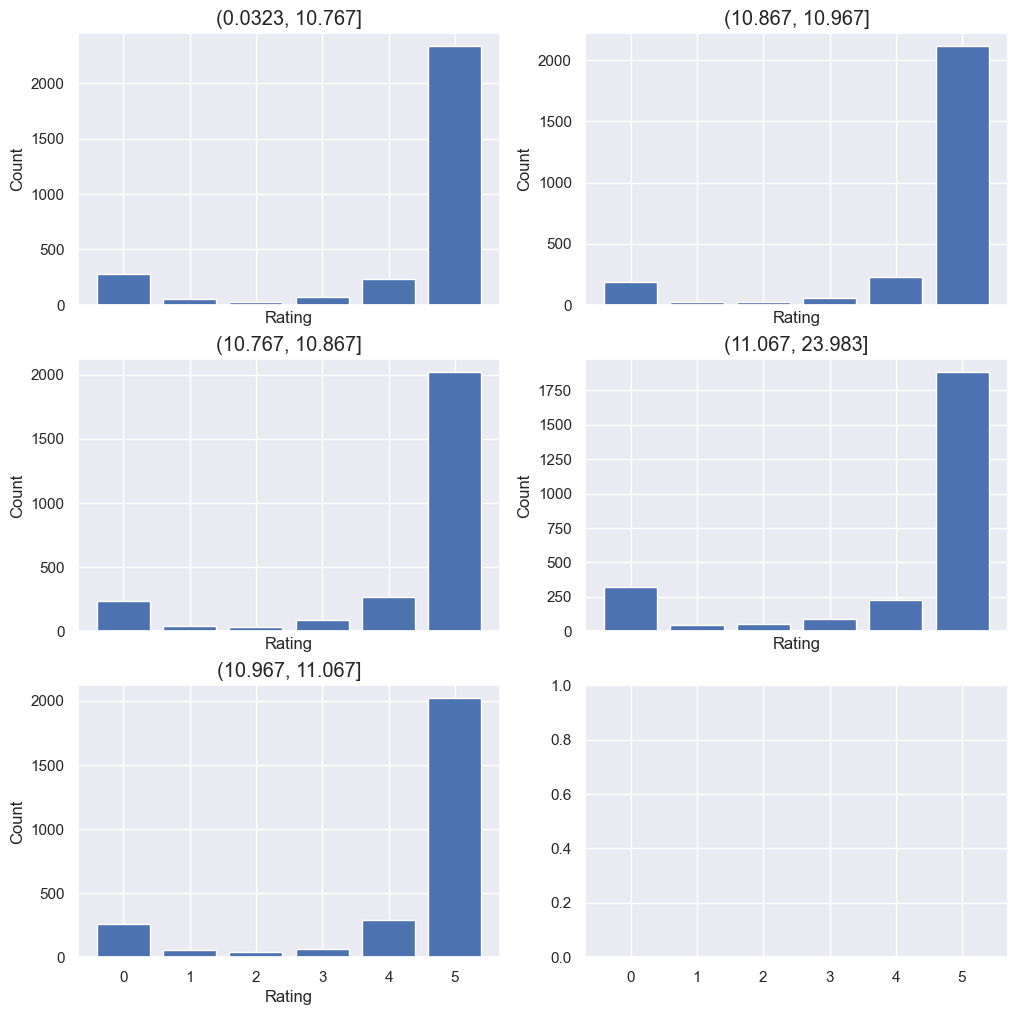

In [27]:
def plot_hour(data):
    new_data=data.copy()
    new_data['Hour_Category']=pd.qcut(new_data['Hour'], 5)
    fig, axs=plt.subplots(3, 2, sharex=True)
    fig.set_size_inches(12, 12)
    for i, hour in enumerate(new_data['Hour_Category'].unique()):
        data=new_data.loc[new_data['Hour_Category']==hour]
        plot_data=data['Rating'].value_counts(ascending=True)
        axs[int(i/2), i%2].bar(plot_data.index, plot_data.values)
        axs[int(i/2), i%2].set_title(hour, fontsize='large')
        axs[int(i/2), i%2].set_ylabel('Count')
        axs[int(i/2), i%2].set_xlabel('Rating')
plot_hour(train_data)

`plot_hour()` method divides the `Hour` feature of the dataset into 5 quantile and plots a bar chart of counts of ratings for each quantile. \
We can see that no matter what time of the day it is, users have posted reviews with rating 5 the most.

In [17]:
plt.axes().set_xlabel()

Object `bar` not found.


plt.ax